### Regressão Linear Múltipla:

In [37]:
# IMPORTANDO AS BIBLIOTECAS:

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# IMPORTANDO O DATASET:

dsl = '/content/drive/MyDrive/datasettrabalho.csv'
df = pd.read_csv(dsl)
df


,Área (m²),Quartos,Distância Centro (km),Idade (anos),Preço Aluguel (R$)
0,45,1,3.0,10,1500
1,50,1,2.5,8,1700
2,55,1,2.0,6,1900
3,60,1,1.5,5,2100
4,65,1,1.0,4,2300
5,70,2,3.5,12,2200
6,75,2,3.0,10,2400
7,80,2,2.5,8,2600
8,85,2,2.0,6,2800
9,90,2,1.5,5,3000


In [39]:
# REALIZANDO A REGRESSÃO:

# Definindo as Variáveis X e Y:
df.columns = df.columns.str.strip()
X = df[["Área (m²)", "Quartos", "Distância Centro (km)", "Idade (anos)"]]
y = df["Preço Aluguel (R$)"]

# Adicionando uma constante para o intercepto β
X = sm.add_constant(X)

# Ajustando o modelo de regressão
modelo = sm.OLS(y, X).fit()

# Exibindo o resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:     Preço Aluguel (R$)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     963.2
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           2.12e-38
Time:                        10:51:01   Log-Likelihood:                -272.88
No. Observations:                  44   AIC:                             555.8
Df Residuals:                      39   BIC:                             564.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    81.59

### **Gráfico de Resíduos Vs Valores Preditos:**

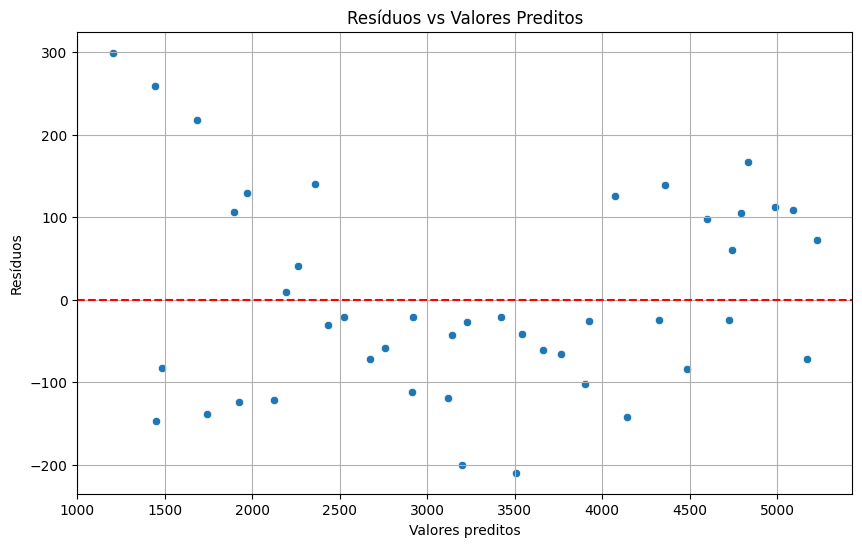

In [40]:
y_pred = modelo.predict(X)
residuos = y - y_pred

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores preditos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Preditos")
plt.grid(True)
plt.show()

### **Histograma dos Resíduos:**

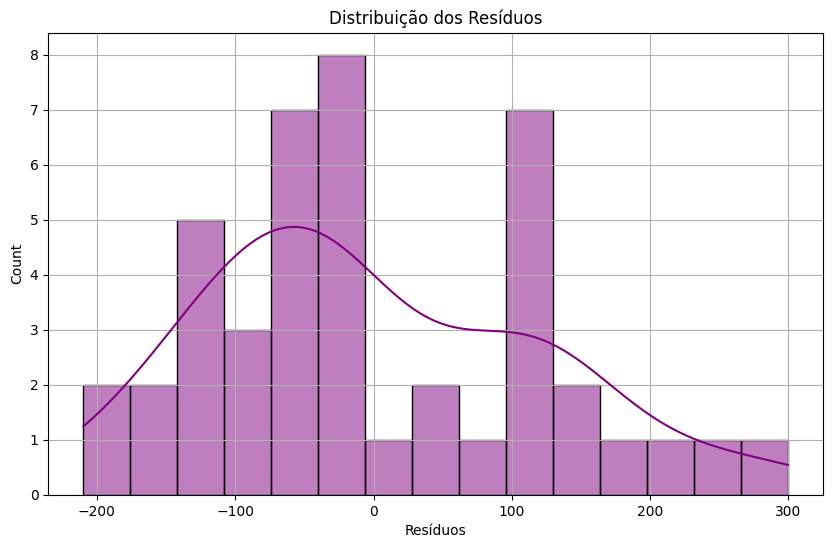

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(residuos, kde=True, bins=15, color='purple')
plt.xlabel("Resíduos")
plt.title("Distribuição dos Resíduos")
plt.grid(True)
plt.show()

## **Conclusões do Trabalho:**

**Teste de significância da regressão:**

F-statistic: 963.2

P-valor: 2.12e-38 (praticamente zero)

O modelo como um todo é altamente significativo. Existe uma relação estatística entre o preço do aluguel e pelo menos uma das variáveis independentes.


**Teste de significância de cada coeficiente:**

Área (m2): Coeficiente = 31.75 e P-valor = 0

Quartos:  Coeficiente = 277.93 e P-valor = 0

Distância do centro (km):  Coeficiente = -355.62 e P-valor = 0

Idade (anos):  Coeficiente = 47.91 e P-valor = 0

Todos os coeficientes são estatisticamente significativos.


**Equação estimada:**

Preço Aluguel = 81,60 + (31,75 × Área m2) + (277,93 × Quartos) + (-355,62 × D. centro) + (47,91 × Idade)